In [16]:
# importing libraries for data scraping
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup



In [17]:
# scraping the data from website

finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN']

news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table




In [18]:
# Converting data in a required format
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

In [19]:
# importing sentiment analysis lybrary & pandas to handle data propery
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [20]:
#Arranging data in proper format

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

vader = SentimentIntensityAnalyzer()

f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date


<Figure size 720x576 with 0 Axes>

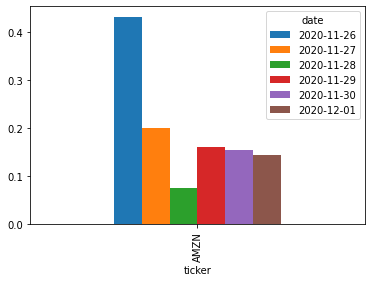

In [22]:
#plotting the sentiment analysis plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()
